# STATEN ISLAND DATA -  LSTM - Multi-Step Forecast - Vector Output Model


## Here I have done the following:

1. Followed steps from this website:
[https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

2. Import necessary modules

3. Fixed the parameters of the code to take in input of previous 60 days and output the next 30 days
    - n_steps_in = 30
    - n_steps_out = 30
    
4. Define the model and predict 30 days of data
5. Note any observations
- for staten island, because of lower sales, I used n_steps_in = 30 

In [1]:
# Imports
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('datasets/rollingsales_statenisland.xls_prepped_bare.csv', usecols=['SALE DATE', 'SALE PRICE'])

In [3]:
df = df.dropna()
df = df.reset_index(drop=True)

In [4]:
df = df.rename(columns={'SALE DATE':'ts', 'SALE PRICE': 'y'})
df.columns = df.columns.astype(str)
df = df.set_index(['ts'], drop=True)
df.index= pd.to_datetime(df.index)

In [5]:
# df

In [6]:
df = df.resample('D').mean()
df = df.reset_index()

In [7]:
df.dropna(inplace=True)
df

,ts,y
0,2020-04-01,577500.000000
1,2020-04-02,650666.666667
2,2020-04-03,519414.285714
5,2020-04-06,572395.000000
6,2020-04-07,688979.222222
...,...,...
345,2021-03-12,567500.000000
348,2021-03-15,379999.000000
351,2021-03-18,270000.000000
357,2021-03-24,255000.000000


In [8]:
raw_input_test = list(df['y'])
raw_input_test
np.shape(df.index)

(258,)

## Below steps are taken from:

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [17]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = raw_input_test

# choose a number of time steps
n_steps_in, n_steps_out = 30, 30

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)


In [18]:
# demonstrate prediction

x_input = array(raw_input_test[228:258])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[357004.47  352214.6   -39032.594  60047.42  675905.4   176297.8
  270960.9   326807.56  296778.5   288628.53  301856.28  357434.28
  450339.78  605499.06  242587.73  252367.45  413589.1   183405.58
  400938.25  341105.03   27913.465 482548.94  481243.1   -92179.836
  625292.7   219362.25  212963.14  144614.88   45206.477 242172.97 ]]


In [19]:
np.shape(list(yhat))

(1, 30)

In [20]:
y_hat1 = np.reshape(yhat, (30,1))
np.shape(y_hat1)

(30, 1)

In [21]:
# I increased the epochs and the predictions went higher.
x_list = list(range(1,288))

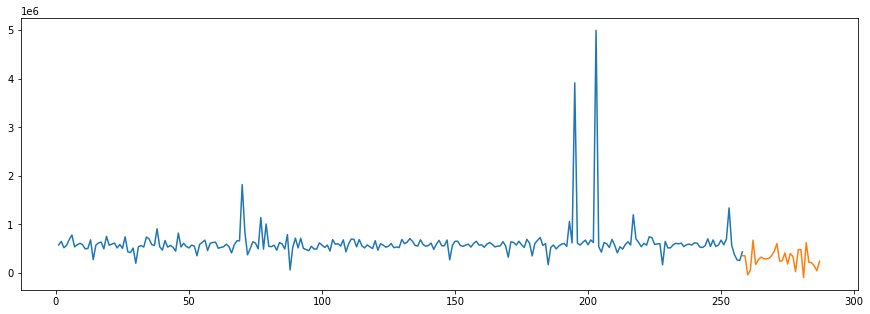

In [27]:
plt.figure(figsize=(15,5))
fig =plt.plot(x_list[0:258], df['y'][0:258])
ax = plt.plot(x_list[257:288], y_hat1)

## Observation

Staten Island prices per model show downward trend with dips

I will have to for future work try with different paraments to see how it affects model predictions